
# ABOUT THE COMPANY(BELLABEAT)


Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company.

KEY STAKEHOLDERS:

Primary Stakeholders:

UrškaSršen: Bellabeat’s cofounder and Chief Creative Officer SandoMur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team

Secondary Stakeholders:

Bellabeat Marketing Analytics Team: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy

BUSINESS TASK:

Identify potential opportunities for growth and recommendations for the Bellabeat marketing strategy improvement based on trends in smart device usage.
    
KEY QUESTIONS:

* What are some trends in smart device usage?
* How could these trends apply to Bellabeat customers?
* How could these trends help influence Bellabeat marketing strategy?

# Environment Setup: <a class="anchor" id="installing_packages_and_opening_libraries_4_1"></a> 

In [1]:
library(tidyverse)
library(tidyr)
library(dplyr)
library(readr)
library(magrittr)
library(lubridate)
library(corrplot)
library(ggplot2)
library("here")
library("skimr")
library("janitor")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract


corrplot 0.92 loaded

here() starts at /kaggle/working


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




# Data Organization and verification: <a class="anchor" id="data_organization_and_verification"></a> 

Available to us are 18 CSV documents. Each document represents different quantitative data tracked by Fitbit. The data is considered long since each row is one time point per subject, so each subject will have data in multiple rows.Every user has a unique ID and different rows since data is tracked by day and time.

Due to the small size of sample I sorted and filtered tables creating Pivot Tables in Excel. I was able to verify attributes and observations of each table and relations between tables. Counted sample size (users) of each table and verified time length of analysis - 31 days.

| Table Name | Type | Description |
| --- | --- | --- |
| dailyActivity_merged | Microsoft Excel CSV | Daily Activity over 31 days of 33 users. Tracking daily: Steps, Distance, Intensities, Calories |
|dailyCalories_merged | Microsoft Excel CSV | Daily Calories over 31  days of 33 users |
| dailyIntensities_merged | Microsoft Excel CSV | Daily Intensity over 31 days of 33 users. Measured in Minutes and Distance, dividing groups in 4 categories: Sedentary, Lightly Active, Fairly Active,Very Active |
| dailySteps_merged | Microsoft Excel CSV | Daily Steps over 31 days of 33 users | 
| heartrate_seconds_merged | Microsoft Excel CSV | Exact day and time heartrate logs for just 7 users |
| hourlyCalories_merged | Microsoft Excel CSV | Hourly Calories burned over 31 days of 33 users |
| hourlyIntensities_merged | Microsoft Excel CSV | Hourly total and average intensity over 31 days of 33 users |
| hourlySteps_merged | Microsoft Excel CSV | Hourly Steps over 31 days of 33 users |
| minuteCaloriesNarrow_merged | Microsoft Excel CSV | Calories burned every minute over 31 days of 33 users (Every minute in single row)|
| minuteCaloriesWide_merged | Microsoft Excel CSV | Calories burned every minute over 31 days of 33 users (Every minute in single column)|
| minuteIntensitiesNarrow_merged | Microsoft Excel CSV | Intensity counted by minute over 31 days of 33 users (Every minute in single row) |
| minuteIntensitiesWide_merged | Microsoft Excel CSV | Intensity counted by minute over 31 days of 33 users (Every minute in single column)|
| minuteMETsNarrow_merged | Microsoft Excel CSV | Ratio of the energy you are using in a physical activity compared to the energy you would use at rest. Counted in minutes |
| minuteSleep_merged | Microsoft Excel CSV | Log Sleep by Minute for 24 users over 31 days. Value column not specified |
| minuteStepsNarrow_merged | Microsoft Excel CSV | Steps tracked every minute over 31 days of 33 users (Every minute in single row)|
| minuteStepsWide_merged | Microsoft Excel CSV | Steps tracked every minute over 31 days of 33 users (Every minute in single column) |
| sleepDay_merged | Microsoft Excel CSV| Daily sleep logs, tracked by: Total count of sleeps a day, Total minutes, Total Time in Bed |
| weightLogInfo_merged | Microsoft Excel CSV | Weight track by day in Kg and Pounds over 30 days. Calculation of BMI.5 users report weight manually 3 users not.In total there are 8 users |

# Importing datasets <a class="anchor" id="importing_datasets_4_2"></a>

In [2]:


dailyActivity_merged <- read.csv("../input/the-fitbase/dailyActivity_merged.csv")
dailyCalories_merged <- read.csv("../input/the-fitbase/dailyCalories_merged.csv")
dailyIntensities_merged <- read.csv("../input/the-fitbase/dailyIntensities_merged.csv")
dailySteps_merged <- read.csv("../input/the-fitbase/dailySteps_merged.csv")
heartrate_seconds_merged <- read.csv("../input/the-fitbase/heartrate_seconds_merged.csv")
hourlyCalories_merged <- read.csv("../input/the-fitbase/hourlyCalories_merged.csv")
hourlyIntensities_merged <- read.csv("../input/the-fitbase/hourlyIntensities_merged.csv")
hourlySteps_merged <- read.csv("../input/the-fitbase/hourlySteps_merged.csv")
minuteCaloriesNarrow_merged <- read.csv("../input/the-fitbase/minuteCaloriesNarrow_merged.csv")
minuteCaloriesWide_merged <- read.csv("../input/the-fitbase/minuteCaloriesWide_merged.csv", header=FALSE)
minuteIntensitiesNarrow_merged <- read.csv("../input/the-fitbase/minuteIntensitiesNarrow_merged.csv")
minuteIntensitiesWide_merged <- read.csv("../input/the-fitbase/minuteIntensitiesWide_merged.csv", header=FALSE)
minuteMETsNarrow_merged <- read.csv("../input/the-fitbase/minuteMETsNarrow_merged.csv")
minuteSleep_merged <- read.csv("../input/the-fitbase/minuteSleep_merged.csv")
minuteStepsNarrow_merged <- read.csv("../input/the-fitbase/minuteStepsNarrow_merged.csv")
minuteStepsWide_merged <- read.csv("../input/the-fitbase/minuteStepsWide_merged.csv", header=FALSE)
sleepDay_merged <- read.csv("../input/the-fitbase/sleepDay_merged.csv")
weightLogInfo_merged <- read.csv("../input/the-fitbase/weightLogInfo_merged.csv")



In [3]:
# Processing 
# Finding the distinct data based on Id from the orignial dataset 

n_distinct(dailyActivity_merged$Id)
n_distinct(dailyCalories_merged$Id)
n_distinct(dailyIntensities_merged$Id)
n_distinct(dailySteps_merged$Id)
n_distinct(hourlyCalories_merged$Id)
n_distinct(hourlyIntensities_merged$Id)
n_distinct(hourlySteps_merged$Id)
n_distinct(minuteCaloriesNarrow_merged$Id)
n_distinct(minuteMETsNarrow_merged$Id)
n_distinct(minuteSleep_merged$Id)
n_distinct(minuteStepsNarrow_merged$Id)
n_distinct(sleepDay_merged$Id)
n_distinct(heartrate_seconds_merged$Id)
n_distinct(weightLogInfo_merged$Id)

[1] 33

[1] 33

[1] 33

[1] 33

[1] 33

[1] 33

[1] 33

[1] 33

[1] 33

[1] 24

[1] 33

[1] 24

[1] 14

[1] 8

* Since heartrate_seconds & weightLogInfo does not have sufficient data, we can not conclude or derive any solid findings from these two datasets.

* There are in total 33 Ids in rest of the datasets, except 24 IDs in sleepDay dataset.

In [4]:
# Cleaning 
library("here")
library("skimr")
library("janitor")

# Checking whether bad data is present in the datasets or not 
# Counting the number of NA values
sum(is.na(dailyActivity_merged))
sum(is.na(dailyCalories_merged))
sum(is.na(dailyIntensities_merged))
sum(is.na(dailySteps_merged))
sum(is.na(heartrate_seconds_merged))
sum(is.na(hourlyCalories_merged))
sum(is.na(hourlyIntensities_merged))
sum(is.na(hourlySteps_merged))
sum(is.na(minuteCaloriesNarrow_merged))
sum(is.na(minuteCaloriesWide_merged))
sum(is.na(minuteIntensitiesNarrow_merged))
sum(is.na(minuteIntensitiesWide_merged))
sum(is.na(minuteMETsNarrow_merged))
sum(is.na(minuteSleep_merged))
sum(is.na(minuteStepsNarrow_merged))
sum(is.na(minuteStepsWide_merged))
sum(is.na(sleepDay_merged))
sum(is.na(weightLogInfo_merged))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 65

 Weight Log Info contains some NA values in different attributes 

In [5]:
WeightLogInfo <- weightLogInfo_merged %>% 
  select(Id,WeightKg,Date,BMI) %>% 
  drop_na()
sum(is.na(WeightLogInfo))

[1] 0

In [6]:
# Checking for Duplicates
sum(duplicated(dailyActivity_merged))
sum(duplicated(dailyCalories_merged))
sum(duplicated(dailyIntensities_merged))
sum(duplicated(dailySteps_merged))
sum(duplicated(heartrate_seconds_merged))
sum(duplicated(hourlyCalories_merged))
sum(duplicated(hourlyIntensities_merged))
sum(duplicated(hourlySteps_merged))
sum(duplicated(minuteCaloriesNarrow_merged))
sum(duplicated(minuteCaloriesWide_merged))
sum(duplicated(minuteIntensitiesNarrow_merged))
sum(duplicated(minuteIntensitiesWide_merged))
sum(duplicated(minuteMETsNarrow_merged))
sum(duplicated(minuteSleep_merged))
sum(duplicated(minuteStepsNarrow_merged))
sum(duplicated(minuteStepsWide_merged))
sum(duplicated(sleepDay_merged))
# Duplicates Found In two datasets

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 543

[1] 0

[1] 0

[1] 3

In [7]:
# Removing duplicates present in minuteSleep & sleepDay data
print("Row Count Before(minutesleep):")
nrow(minuteSleep_merged)
minutesleep <- minuteSleep_merged[!duplicated(minuteSleep_merged), ]
print("Duplicated Rows(minutesleep):")
sum(duplicated(minutesleep))
print("Row Count After(minutesleep):")
nrow(minutesleep)

# Removing duplicates present in sleepday data
print("Row Count Before(sleepday):")
nrow(sleepDay_merged)
sleepday <- sleepDay_merged[!duplicated(sleepDay_merged),]
print("Duplicated Rows(sleepday):")
sum(duplicated(sleepday))
print("Row Count After(sleepday):")
nrow(sleepday)

[1] "Row Count Before(minutesleep):"


[1] 188521

[1] "Duplicated Rows(minutesleep):"


[1] 0

[1] "Row Count After(minutesleep):"


[1] 187978

[1] "Row Count Before(sleepday):"


[1] 413

[1] "Duplicated Rows(sleepday):"


[1] 0

[1] "Row Count After(sleepday):"


[1] 410

In [8]:
# Transformation steps
# Analyzing the data sets
head(dailyActivity_merged)
str(dailyActivity_merged)
head(dailyCalories_merged)
str(dailyCalories_merged)
head(dailyIntensities_merged)
str(dailyIntensities_merged)
head(dailySteps_merged)
str(dailySteps_merged)
head(heartrate_seconds_merged)
str(heartrate_seconds_merged)
head(hourlyCalories_merged)
str(hourlyCalories_merged)
head(hourlyIntensities_merged)
str(hourlyIntensities_merged)
head(hourlySteps_merged)
str(hourlySteps_merged)
head(minuteCaloriesNarrow_merged)
str(minuteCaloriesNarrow_merged)
head(minuteCaloriesWide_merged)
str(minuteCaloriesWide_merged)
head(minuteIntensitiesNarrow_merged)
str(minuteIntensitiesNarrow_merged)
head(minuteIntensitiesWide_merged)
str(minuteIntensitiesWide_merged)
head(minuteMETsNarrow_merged)
str(minuteMETsNarrow_merged)
head(minutesleep)
str(minutesleep)
head(minuteStepsNarrow_merged)
str(minuteStepsNarrow_merged)
head(minuteStepsWide_merged)
str(minuteStepsWide_merged)
head(sleepday)
str(sleepday)
head(WeightLogInfo)
str(WeightLogInfo)


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 

,Id,ActivityDay,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,1985
2,1503960366,4/13/2016,1797
3,1503960366,4/14/2016,1776
4,1503960366,4/15/2016,1745
5,1503960366,4/16/2016,1863
6,1503960366,4/17/2016,1728


'data.frame':	940 obs. of  3 variables:
 $ Id         : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDay: chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ Calories   : int  1985 1797 1776 1745 1863 1728 1921 2035 1786 1775 ...


,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
,<dbl>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,4/12/2016,728,328,13,25,0,6.06,0.55,1.88
2,1503960366,4/13/2016,776,217,19,21,0,4.71,0.69,1.57
3,1503960366,4/14/2016,1218,181,11,30,0,3.91,0.40,2.44
4,1503960366,4/15/2016,726,209,34,29,0,2.83,1.26,2.14
5,1503960366,4/16/2016,773,221,10,36,0,5.04,0.41,2.71
6,1503960366,4/17/2016,539,164,20,38,0,2.51,0.78,3.19


'data.frame':	940 obs. of  10 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDay             : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 1149 775 818 838 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...


,Id,ActivityDay,StepTotal
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,13162
2,1503960366,4/13/2016,10735
3,1503960366,4/14/2016,10460
4,1503960366,4/15/2016,9762
5,1503960366,4/16/2016,12669
6,1503960366,4/17/2016,9705


'data.frame':	940 obs. of  3 variables:
 $ Id         : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDay: chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ StepTotal  : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...


,Id,Time,Value
,<dbl>,<chr>,<int>
1,2022484408,4/12/2016 7:21:00 AM,97
2,2022484408,4/12/2016 7:21:05 AM,102
3,2022484408,4/12/2016 7:21:10 AM,105
4,2022484408,4/12/2016 7:21:20 AM,103
5,2022484408,4/12/2016 7:21:25 AM,101
6,2022484408,4/12/2016 7:22:05 AM,95


'data.frame':	2483658 obs. of  3 variables:
 $ Id   : num  2.02e+09 2.02e+09 2.02e+09 2.02e+09 2.02e+09 ...
 $ Time : chr  "4/12/2016 7:21:00 AM" "4/12/2016 7:21:05 AM" "4/12/2016 7:21:10 AM" "4/12/2016 7:21:20 AM" ...
 $ Value: int  97 102 105 103 101 95 91 93 94 93 ...


,Id,ActivityHour,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,81
2,1503960366,4/12/2016 1:00:00 AM,61
3,1503960366,4/12/2016 2:00:00 AM,59
4,1503960366,4/12/2016 3:00:00 AM,47
5,1503960366,4/12/2016 4:00:00 AM,48
6,1503960366,4/12/2016 5:00:00 AM,48


'data.frame':	22099 obs. of  3 variables:
 $ Id          : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour: chr  "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ Calories    : int  81 61 59 47 48 48 48 47 68 141 ...


,Id,ActivityHour,TotalIntensity,AverageIntensity
,<dbl>,<chr>,<int>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,20,0.333333
2,1503960366,4/12/2016 1:00:00 AM,8,0.133333
3,1503960366,4/12/2016 2:00:00 AM,7,0.116667
4,1503960366,4/12/2016 3:00:00 AM,0,0.000000
5,1503960366,4/12/2016 4:00:00 AM,0,0.000000
6,1503960366,4/12/2016 5:00:00 AM,0,0.000000


'data.frame':	22099 obs. of  4 variables:
 $ Id              : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour    : chr  "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ TotalIntensity  : int  20 8 7 0 0 0 0 0 13 30 ...
 $ AverageIntensity: num  0.333 0.133 0.117 0 0 ...


,Id,ActivityHour,StepTotal
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,373
2,1503960366,4/12/2016 1:00:00 AM,160
3,1503960366,4/12/2016 2:00:00 AM,151
4,1503960366,4/12/2016 3:00:00 AM,0
5,1503960366,4/12/2016 4:00:00 AM,0
6,1503960366,4/12/2016 5:00:00 AM,0


'data.frame':	22099 obs. of  3 variables:
 $ Id          : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour: chr  "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ StepTotal   : int  373 160 151 0 0 0 0 0 250 1864 ...


,Id,ActivityMinute,Calories
,<dbl>,<chr>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,0.7865
2,1503960366,4/12/2016 12:01:00 AM,0.7865
3,1503960366,4/12/2016 12:02:00 AM,0.7865
4,1503960366,4/12/2016 12:03:00 AM,0.7865
5,1503960366,4/12/2016 12:04:00 AM,0.7865
6,1503960366,4/12/2016 12:05:00 AM,0.9438


'data.frame':	1325580 obs. of  3 variables:
 $ Id            : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityMinute: chr  "4/12/2016 12:00:00 AM" "4/12/2016 12:01:00 AM" "4/12/2016 12:02:00 AM" "4/12/2016 12:03:00 AM" ...
 $ Calories      : num  0.786 0.786 0.786 0.786 0.786 ...


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Id,ActivityHour,Calories00,Calories01,Calories02,Calories03,Calories04,Calories05,Calories06,Calories07,⋯,Calories50,Calories51,Calories52,Calories53,Calories54,Calories55,Calories56,Calories57,Calories58,Calories59
2,1503960366,4/13/2016 12:00:00 AM,1.88759994506836,2.20219993591309,0.94379997253418,0.94379997253418,0.94379997253418,2.04489994049072,0.94379997253418,2.20219993591309,⋯,0.94379997253418,2.04489994049072,2.04489994049072,0.94379997253418,2.35949993133545,1.88759994506836,0.94379997253418,0.94379997253418,0.94379997253418,0.94379997253418
3,1503960366,4/13/2016 1:00:00 AM,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816,0.94379997253418,0.94379997253418,0.94379997253418,0.786499977111816,⋯,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816
4,1503960366,4/13/2016 2:00:00 AM,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816,⋯,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816
5,1503960366,4/13/2016 3:00:00 AM,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816,⋯,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816
6,1503960366,4/13/2016 4:00:00 AM,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816,⋯,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816,0.786499977111816


'data.frame':	21646 obs. of  62 variables:
 $ V1 : chr  "Id" "1503960366" "1503960366" "1503960366" ...
 $ V2 : chr  "ActivityHour" "4/13/2016 12:00:00 AM" "4/13/2016 1:00:00 AM" "4/13/2016 2:00:00 AM" ...
 $ V3 : chr  "Calories00" "1.88759994506836" "0.786499977111816" "0.786499977111816" ...
 $ V4 : chr  "Calories01" "2.20219993591309" "0.786499977111816" "0.786499977111816" ...
 $ V5 : chr  "Calories02" "0.94379997253418" "0.786499977111816" "0.786499977111816" ...
 $ V6 : chr  "Calories03" "0.94379997253418" "0.786499977111816" "0.786499977111816" ...
 $ V7 : chr  "Calories04" "0.94379997253418" "0.94379997253418" "0.786499977111816" ...
 $ V8 : chr  "Calories05" "2.04489994049072" "0.94379997253418" "0.786499977111816" ...
 $ V9 : chr  "Calories06" "0.94379997253418" "0.94379997253418" "0.786499977111816" ...
 $ V10: chr  "Calories07" "2.20219993591309" "0.786499977111816" "0.786499977111816" ...
 $ V11: chr  "Calories08" "0.94379997253418" "0.94379997253418" "0.786499977111816" .

,Id,ActivityMinute,Intensity
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,0
2,1503960366,4/12/2016 12:01:00 AM,0
3,1503960366,4/12/2016 12:02:00 AM,0
4,1503960366,4/12/2016 12:03:00 AM,0
5,1503960366,4/12/2016 12:04:00 AM,0
6,1503960366,4/12/2016 12:05:00 AM,0


'data.frame':	1325580 obs. of  3 variables:
 $ Id            : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityMinute: chr  "4/12/2016 12:00:00 AM" "4/12/2016 12:01:00 AM" "4/12/2016 12:02:00 AM" "4/12/2016 12:03:00 AM" ...
 $ Intensity     : int  0 0 0 0 0 0 0 0 0 0 ...


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Id,ActivityHour,Intensity00,Intensity01,Intensity02,Intensity03,Intensity04,Intensity05,Intensity06,Intensity07,⋯,Intensity50,Intensity51,Intensity52,Intensity53,Intensity54,Intensity55,Intensity56,Intensity57,Intensity58,Intensity59
2,1503960366,4/13/2016 12:00:00 AM,1,1,0,0,0,1,0,1,⋯,0,1,1,0,1,1,0,0,0,0
3,1503960366,4/13/2016 1:00:00 AM,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,1503960366,4/13/2016 2:00:00 AM,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,1503960366,4/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,1503960366,4/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


'data.frame':	21646 obs. of  62 variables:
 $ V1 : chr  "Id" "1503960366" "1503960366" "1503960366" ...
 $ V2 : chr  "ActivityHour" "4/13/2016 12:00:00 AM" "4/13/2016 1:00:00 AM" "4/13/2016 2:00:00 AM" ...
 $ V3 : chr  "Intensity00" "1" "0" "0" ...
 $ V4 : chr  "Intensity01" "1" "0" "0" ...
 $ V5 : chr  "Intensity02" "0" "0" "0" ...
 $ V6 : chr  "Intensity03" "0" "0" "0" ...
 $ V7 : chr  "Intensity04" "0" "0" "0" ...
 $ V8 : chr  "Intensity05" "1" "0" "0" ...
 $ V9 : chr  "Intensity06" "0" "0" "0" ...
 $ V10: chr  "Intensity07" "1" "0" "0" ...
 $ V11: chr  "Intensity08" "0" "0" "0" ...
 $ V12: chr  "Intensity09" "0" "0" "0" ...
 $ V13: chr  "Intensity10" "0" "0" "0" ...
 $ V14: chr  "Intensity11" "0" "0" "0" ...
 $ V15: chr  "Intensity12" "0" "0" "0" ...
 $ V16: chr  "Intensity13" "0" "0" "0" ...
 $ V17: chr  "Intensity14" "0" "0" "0" ...
 $ V18: chr  "Intensity15" "0" "0" "0" ...
 $ V19: chr  "Intensity16" "0" "0" "0" ...
 $ V20: chr  "Intensity17" "0" "0" "0" ...
 $ V21: chr  "Intens

,Id,ActivityMinute,METs
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,10
2,1503960366,4/12/2016 12:01:00 AM,10
3,1503960366,4/12/2016 12:02:00 AM,10
4,1503960366,4/12/2016 12:03:00 AM,10
5,1503960366,4/12/2016 12:04:00 AM,10
6,1503960366,4/12/2016 12:05:00 AM,12


'data.frame':	1325580 obs. of  3 variables:
 $ Id            : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityMinute: chr  "4/12/2016 12:00:00 AM" "4/12/2016 12:01:00 AM" "4/12/2016 12:02:00 AM" "4/12/2016 12:03:00 AM" ...
 $ METs          : int  10 10 10 10 10 12 12 12 12 12 ...


,Id,date,value,logId
,<dbl>,<chr>,<int>,<dbl>
1,1503960366,4/12/2016 2:47:30 AM,3,11380564589
2,1503960366,4/12/2016 2:48:30 AM,2,11380564589
3,1503960366,4/12/2016 2:49:30 AM,1,11380564589
4,1503960366,4/12/2016 2:50:30 AM,1,11380564589
5,1503960366,4/12/2016 2:51:30 AM,1,11380564589
6,1503960366,4/12/2016 2:52:30 AM,1,11380564589


'data.frame':	187978 obs. of  4 variables:
 $ Id   : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ date : chr  "4/12/2016 2:47:30 AM" "4/12/2016 2:48:30 AM" "4/12/2016 2:49:30 AM" "4/12/2016 2:50:30 AM" ...
 $ value: int  3 2 1 1 1 1 1 2 2 2 ...
 $ logId: num  1.14e+10 1.14e+10 1.14e+10 1.14e+10 1.14e+10 ...


,Id,ActivityMinute,Steps
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,0
2,1503960366,4/12/2016 12:01:00 AM,0
3,1503960366,4/12/2016 12:02:00 AM,0
4,1503960366,4/12/2016 12:03:00 AM,0
5,1503960366,4/12/2016 12:04:00 AM,0
6,1503960366,4/12/2016 12:05:00 AM,0


'data.frame':	1325580 obs. of  3 variables:
 $ Id            : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityMinute: chr  "4/12/2016 12:00:00 AM" "4/12/2016 12:01:00 AM" "4/12/2016 12:02:00 AM" "4/12/2016 12:03:00 AM" ...
 $ Steps         : int  0 0 0 0 0 0 0 0 0 0 ...


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Id,ActivityHour,Steps00,Steps01,Steps02,Steps03,Steps04,Steps05,Steps06,Steps07,⋯,Steps50,Steps51,Steps52,Steps53,Steps54,Steps55,Steps56,Steps57,Steps58,Steps59
2,1503960366,4/13/2016 12:00:00 AM,4,16,0,0,0,9,0,17,⋯,0,9,8,0,20,1,0,0,0,0
3,1503960366,4/13/2016 1:00:00 AM,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,1503960366,4/13/2016 2:00:00 AM,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,1503960366,4/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,1503960366,4/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


'data.frame':	21646 obs. of  62 variables:
 $ V1 : chr  "Id" "1503960366" "1503960366" "1503960366" ...
 $ V2 : chr  "ActivityHour" "4/13/2016 12:00:00 AM" "4/13/2016 1:00:00 AM" "4/13/2016 2:00:00 AM" ...
 $ V3 : chr  "Steps00" "4" "0" "0" ...
 $ V4 : chr  "Steps01" "16" "0" "0" ...
 $ V5 : chr  "Steps02" "0" "0" "0" ...
 $ V6 : chr  "Steps03" "0" "0" "0" ...
 $ V7 : chr  "Steps04" "0" "0" "0" ...
 $ V8 : chr  "Steps05" "9" "0" "0" ...
 $ V9 : chr  "Steps06" "0" "0" "0" ...
 $ V10: chr  "Steps07" "17" "0" "0" ...
 $ V11: chr  "Steps08" "0" "0" "0" ...
 $ V12: chr  "Steps09" "0" "0" "0" ...
 $ V13: chr  "Steps10" "0" "0" "0" ...
 $ V14: chr  "Steps11" "0" "0" "0" ...
 $ V15: chr  "Steps12" "0" "0" "0" ...
 $ V16: chr  "Steps13" "0" "0" "0" ...
 $ V17: chr  "Steps14" "0" "0" "0" ...
 $ V18: chr  "Steps15" "0" "0" "0" ...
 $ V19: chr  "Steps16" "0" "0" "0" ...
 $ V20: chr  "Steps17" "0" "0" "0" ...
 $ V21: chr  "Steps18" "0" "0" "0" ...
 $ V22: chr  "Steps19" "0" "0" "0" ...
 $ V23: chr 

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


'data.frame':	410 obs. of  5 variables:
 $ Id                : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr  "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords : int  1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: int  327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : int  346 407 442 367 712 320 377 364 384 449 ...


,Id,WeightKg,Date,BMI
,<dbl>,<dbl>,<chr>,<dbl>
1,1503960366,52.6,5/2/2016 11:59:59 PM,22.65
2,1503960366,52.6,5/3/2016 11:59:59 PM,22.65
3,1927972279,133.5,4/13/2016 1:08:52 AM,47.54
4,2873212765,56.7,4/21/2016 11:59:59 PM,21.45
5,2873212765,57.3,5/12/2016 11:59:59 PM,21.69
6,4319703577,72.4,4/17/2016 11:59:59 PM,27.45


'data.frame':	67 obs. of  4 variables:
 $ Id      : num  1.50e+09 1.50e+09 1.93e+09 2.87e+09 2.87e+09 ...
 $ WeightKg: num  52.6 52.6 133.5 56.7 57.3 ...
 $ Date    : chr  "5/2/2016 11:59:59 PM" "5/3/2016 11:59:59 PM" "4/13/2016 1:08:52 AM" "4/21/2016 11:59:59 PM" ...
 $ BMI     : num  22.6 22.6 47.5 21.5 21.7 ...


In [9]:
# working with dates
dailyActivity_merged$ActivityDate <- gsub("/","-",dailyActivity_merged$ActivityDate) %>% 
  parse_date_time(orders = "mdy")
class(dailyActivity_merged$ActivityDate)
dailyCalories_merged$ActivityDay <- gsub("/","-",dailyCalories_merged$ActivityDay) %>% 
  parse_date_time(orders = "mdy")
class(dailyCalories_merged$ActivityDay)
dailyIntensities_merged$ActivityDay <- gsub("/","-",dailyIntensities_merged$ActivityDay) %>% 
  parse_date_time(orders = "mdy")
class(dailyIntensities_merged$ActivityDay)
dailySteps_merged$ActivityDay <- gsub("/","-",dailySteps_merged$ActivityDay) %>% 
  parse_date_time(orders = "mdy")
class(dailySteps_merged$ActivityDay)
heartrate_seconds_merged$Time <- gsub("/","-",heartrate_seconds_merged$Time) %>% 
  parse_date_time(orders = "mdy")
class(heartrate_seconds_merged$Time)
hourlyCalories_merged$ActivityHour <- gsub("/","-",hourlyCalories_merged$ActivityHour) %>% 
  parse_date_time(orders = "mdy")
class(hourlyCalories_merged$ActivityHour)
hourlyIntensities_merged$ActivityHour <- gsub("/","-",hourlyIntensities_merged$ActivityHour) %>%
  parse_date_time(orders = "mdy")
class(hourlyIntensities_merged$ActivityHour)
hourlySteps_merged$ActivityHour <- gsub("/","-",hourlySteps_merged$ActivityHour) %>% 
  parse_date_time(orders = "mdy")
class(hourlySteps_merged$ActivityHour)
minuteCaloriesNarrow_merged$ActivityMinute <- gsub("/","-",minuteCaloriesNarrow_merged$ActivityMinute) %>% 
  parse_date_time(orders = "mdy")
class(minuteCaloriesNarrow_merged$ActivityMinute)
minuteCaloriesWide_merged$V2 <- gsub("/","-",minuteCaloriesWide_merged$V2) %>% 
  parse_date_time(orders = "mdy")
class(minuteCaloriesWide_merged$V2)
minuteIntensitiesNarrow_merged$ActivityMinute <- gsub("/","-",minuteIntensitiesNarrow_merged$ActivityMinute) %>% 
  parse_date_time(orders = "mdy")
class(minuteIntensitiesNarrow_merged$ActivityMinute)
minuteIntensitiesWide_merged$V2 <- gsub("/","-",minuteIntensitiesWide_merged$V2) %>% 
  parse_date_time(orders = "mdy")
class(minuteIntensitiesWide_merged$V2)
minuteMETsNarrow_merged$ActivityMinute <- gsub("/","-",minuteMETsNarrow_merged$ActivityMinute) %>% 
  parse_date_time(orders = "mdy")
class(minuteMETsNarrow_merged$ActivityMinute)
minutesleep$date <- gsub("/","-",minutesleep$date) %>% 
  parse_date_time(orders = "mdy")
class(minutesleep$date)
minuteStepsNarrow_merged$ActivityMinute <- gsub("/","-",minuteStepsNarrow_merged$ActivityMinute) %>% 
  parse_date_time(orders = "mdy")
class(minuteStepsNarrow_merged$ActivityMinute)
minuteStepsWide_merged$V2 <- gsub("/","-",minuteStepsWide_merged$V2) %>% 
  parse_date_time(orders = "mdy")
class(minuteStepsWide_merged$V2)
sleepday$SleepDay <- gsub("/","-",sleepday$SleepDay) %>% 
  parse_date_time(orders = "mdy HMS") %>% 
  as_date()
class(sleepday$SleepDay)
WeightLogInfo$Date <- gsub("/","-",WeightLogInfo$Date) %>% 
  parse_date_time(orders = "mdy")
class(WeightLogInfo$Date)

[1] "POSIXct" "POSIXt"

[1] "POSIXct" "POSIXt"

[1] "POSIXct" "POSIXt"

[1] "POSIXct" "POSIXt"

Warning message:
“All formats failed to parse. No formats found.”


[1] "POSIXct" "POSIXt"

Warning message:
“All formats failed to parse. No formats found.”


[1] "POSIXct" "POSIXt"

Warning message:
“All formats failed to parse. No formats found.”


[1] "POSIXct" "POSIXt"

Warning message:
“All formats failed to parse. No formats found.”


[1] "POSIXct" "POSIXt"

Warning message:
“All formats failed to parse. No formats found.”


[1] "POSIXct" "POSIXt"

Warning message:
“All formats failed to parse. No formats found.”


[1] "POSIXct" "POSIXt"

Warning message:
“All formats failed to parse. No formats found.”


[1] "POSIXct" "POSIXt"

Warning message:
“All formats failed to parse. No formats found.”


[1] "POSIXct" "POSIXt"

Warning message:
“All formats failed to parse. No formats found.”


[1] "POSIXct" "POSIXt"

Warning message:
“All formats failed to parse. No formats found.”


[1] "POSIXct" "POSIXt"

Warning message:
“All formats failed to parse. No formats found.”


[1] "POSIXct" "POSIXt"

Warning message:
“All formats failed to parse. No formats found.”


[1] "POSIXct" "POSIXt"

[1] "Date"

Warning message:
“All formats failed to parse. No formats found.”


[1] "POSIXct" "POSIXt"

In [10]:
# In DailyActivity_merged dataframe,
# Creating a new Categorical Attributes as "TypeOfUsers":"Inactive,Average,Active,VeryActive" 
# Inactive: less than 5,000 steps per day
# Average: ranges from 5,000 to 8,000 steps per day
# Active: ranges from 8000 to 12500 steps
# Very active: more than 12,500 steps per day
dailyActivity_merged = mutate(dailyActivity_merged,TypeOfUser =case_when(
  TotalSteps >= 12500 ~ "VeryActive",
  TotalSteps >= 8000 & TotalSteps < 12500 ~ "Active",
  TotalSteps >= 5000 & TotalSteps < 8000 ~ "Average",
  TotalSteps < 5000 ~ "Inactive"
))
# Creating a new attribute as "TotalActiveMinutes" for every users
dailyActivity_merged = mutate(dailyActivity_merged,TotalActiveMinutes= VeryActiveMinutes+FairlyActiveMinutes+LightlyActiveMinutes)

# Converting the "TypeOfUser" attribute as factor
dailyActivity_merged$TypeOfUser = as.factor(dailyActivity_merged$TypeOfUser)

# Creating a new Variable "DayOfWeek" which will store the weekdays
dailyActivity_merged = mutate(dailyActivity_merged,DayOfWeek= wday(ActivityDate,label = TRUE))

head(dailyActivity_merged)


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TypeOfUser,TotalActiveMinutes,DayOfWeek
,<dbl>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<ord>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,VeryActive,366,Tue
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,Active,257,Wed
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,Active,222,Thu
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,Active,272,Fri
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,VeryActive,267,Sat
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,Active,222,Sun


In [11]:
# In sleepDay data,

# Mutating a new column as "TimeToSleep" which will calculate the time taken by an individual to sleep
sleepday = mutate(sleepday,TimeToSleep = as.numeric(TotalTimeInBed)- as.numeric(TotalMinutesAsleep))

# Mutating a new Column as "SleepQualtiy" which will categorize the users based on sleep hours
sleepday = mutate(sleepday,SleepQuality = case_when( 
  TotalMinutesAsleep/60 >= 6 &TotalMinutesAsleep/60 <= 8 ~ "Sufficient",
  TotalMinutesAsleep/60 < 6 ~ "insufficient",
  TotalMinutesAsleep/60 > 8 ~ "oversleeping"
))

# Converting the "SleepQuality" attribute as factor
sleepday$SleepQuality = as.factor(sleepday$SleepQuality)

# Mutating a new Column "DayOfWeek"
sleepday = mutate(sleepday,DayOfWeek= wday(SleepDay,label = TRUE))

head(sleepday)


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TimeToSleep,SleepQuality,DayOfWeek
,<dbl>,<date>,<int>,<int>,<int>,<dbl>,<fct>,<ord>
1,1503960366,2016-04-12,1,327,346,19,insufficient,Tue
2,1503960366,2016-04-13,2,384,407,23,Sufficient,Wed
3,1503960366,2016-04-15,1,412,442,30,Sufficient,Fri
4,1503960366,2016-04-16,2,340,367,27,insufficient,Sat
5,1503960366,2016-04-17,1,700,712,12,oversleeping,Sun
6,1503960366,2016-04-19,1,304,320,16,insufficient,Tue


# DESCRIPTIVE ANALYSIS

In [12]:
# Daily Activity Summary

dailyActivity_merged %>% 
  select(TotalSteps,TotalDistance,SedentaryMinutes,Calories,TypeOfUser,TotalActiveMinutes) %>% 
  summary()

   TotalSteps    TotalDistance    SedentaryMinutes    Calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :1057.5   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :4900  
      TypeOfUser  TotalActiveMinutes
 Active    :289   Min.   :  0.0     
 Average   :204   1st Qu.:146.8     
 Inactive  :303   Median :247.0     
 VeryActive:144   Mean   :227.5     
                  3rd Qu.:317.2     
                  Max.   :552.0     

ANALYSIS:

* Here we can see that the Average of Total Steps Count is 7600(approx) which is little lower than the average daily steps count preferred by WHO i.e 8000 steps

* Bellabeat can notify its user through their mobile application regarding the remaining daily steps count to complete.

* The maximum number of users fall into Inactive Category and Bellabeat can focus on these users.

In [13]:
# Active minutes summary

dailyIntensities_merged %>% 
  select(SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,ModeratelyActiveDistance,VeryActiveDistance,VeryActiveMinutes) %>% 
  summary()

 SedentaryMinutes LightlyActiveMinutes FairlyActiveMinutes
 Min.   :   0.0   Min.   :  0.0        Min.   :  0.00     
 1st Qu.: 729.8   1st Qu.:127.0        1st Qu.:  0.00     
 Median :1057.5   Median :199.0        Median :  6.00     
 Mean   : 991.2   Mean   :192.8        Mean   : 13.56     
 3rd Qu.:1229.5   3rd Qu.:264.0        3rd Qu.: 19.00     
 Max.   :1440.0   Max.   :518.0        Max.   :143.00     
 ModeratelyActiveDistance VeryActiveDistance VeryActiveMinutes
 Min.   :0.0000           Min.   : 0.000     Min.   :  0.00   
 1st Qu.:0.0000           1st Qu.: 0.000     1st Qu.:  0.00   
 Median :0.2400           Median : 0.210     Median :  4.00   
 Mean   :0.5675           Mean   : 1.503     Mean   : 21.16   
 3rd Qu.:0.8000           3rd Qu.: 2.053     3rd Qu.: 32.00   
 Max.   :6.4800           Max.   :21.920     Max.   :210.00   

ANALYSIS:

* We can clearly distinguish the difference between average Lightly Active Minutes and Fairly/Moderate/Very Active Minutes

* The average Sedentary Minutes is also quite high i.e 16hrs(approx).This helps to identify that most of the users were Lightly Active or Inactive.

In [14]:
# sleepday summary

sleepday %>% 
  select(TotalMinutesAsleep,TotalTimeInBed,TimeToSleep,SleepQuality) %>% 
  summary()

 TotalMinutesAsleep TotalTimeInBed   TimeToSleep           SleepQuality
 Min.   : 58.0      Min.   : 61.0   Min.   :  0.00   insufficient:100  
 1st Qu.:361.0      1st Qu.:403.8   1st Qu.: 17.00   oversleeping:114  
 Median :432.5      Median :463.0   Median : 25.50   Sufficient  :196  
 Mean   :419.2      Mean   :458.5   Mean   : 39.31                     
 3rd Qu.:490.0      3rd Qu.:526.0   3rd Qu.: 40.00                     
 Max.   :796.0      Max.   :961.0   Max.   :371.00                     

ANALYSIS:

* There is a unique finding from the above analysis, the "TimeToSleep" (attribute which calculate the time difference between Total time in bed and total time asleep) helps to identify that average time interval is 39.31 minutes. Belabeat can use this data to Monitor the sleep Pattern and can provide suggestion to its Users on "How to improve the sleep Quality?" etc.

In [15]:
# weightlog summary

WeightLogInfo %>% 
  select(WeightKg,BMI) %>% 
  summary()

    WeightKg           BMI       
 Min.   : 52.60   Min.   :21.45  
 1st Qu.: 61.40   1st Qu.:23.96  
 Median : 62.50   Median :24.39  
 Mean   : 72.04   Mean   :25.19  
 3rd Qu.: 85.05   3rd Qu.:25.56  
 Max.   :133.50   Max.   :47.54  

ANALYSIS:

* The normal BMI falls in the range of 18.5 – 24.9. And we can see that the Mean BMI of the users is 25.29 which falls in the category of Overweight.

Note- As there is no sufficient amount of data present in weightLogInfo dataset, its hard to derive any conclusion from the above analysis.

# EXPLORATORY DATA ANALYSIS USING GGPLOT PACKAGE

In [16]:
# VISUALIZING THE DATA USING GGPLOT2 PACKAGE
# TO FIND TRENDS IN OUR DATA USING VARIOUS PLOTS

# Checking the Correlation between the two variables
print("Correlation between Calories and TotalSteps")
cor(dailyActivity_merged$TotalSteps,dailyActivity_merged$Calories)

[1] "Correlation between Calories and TotalSteps"


[1] 0.5915681

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


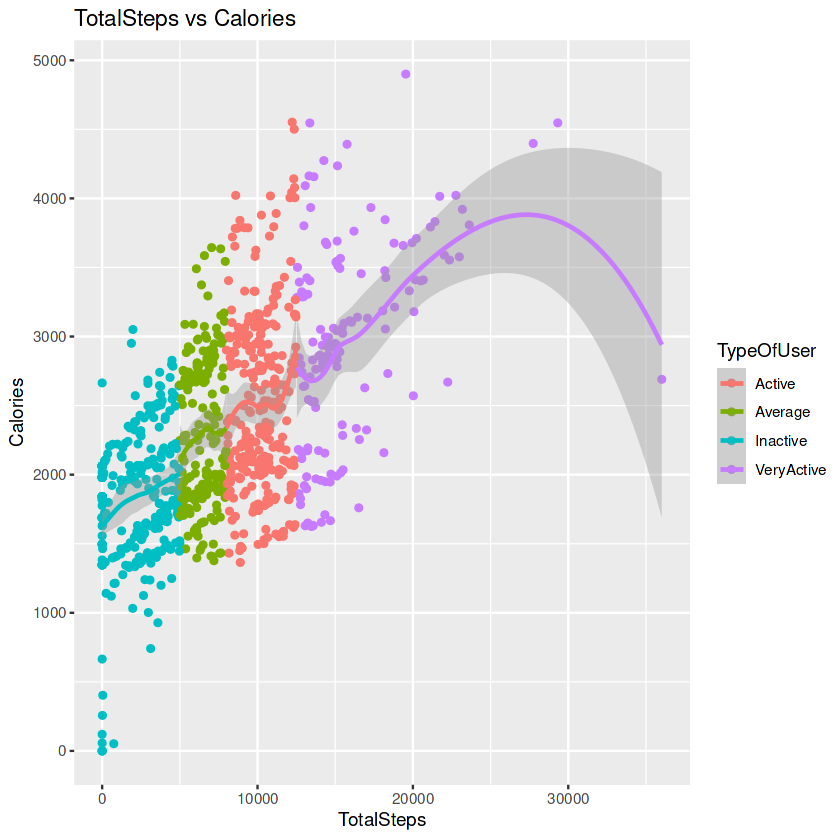

In [17]:
# 1. 
# We are finding Positive Correlation between these two Variables.
# Visualizing the relationship between steps and Calories

ggplot(dailyActivity_merged,aes(x= TotalSteps, y= Calories,color= TypeOfUser)) +
  geom_point() +
  geom_smooth() +
  labs(title = "TotalSteps vs Calories")

![](http://)

ANALYSIS:

* We can see that there exist a positive correlation between the totalsteps~Calories.

* Its obvious thing that higher the number of TotalSteps, higher will be the calories burned. And this hypothesis is proved by above graph.

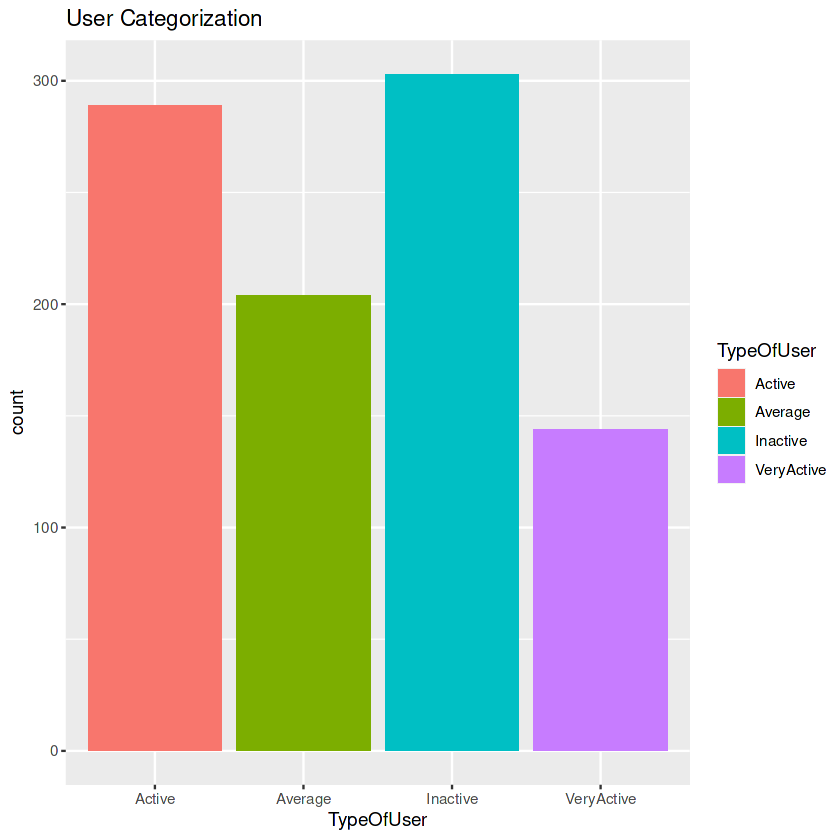

In [18]:
# 2. 
# Visualize the types of Users present in dailyActivity Data and Analyzing them

ggplot(dailyActivity_merged,aes(x= TypeOfUser, fill= TypeOfUser)) +
  geom_bar() +
  labs(title= "User Categorization")

ANALYSIS:

* From the above graph we can see that most of the users fall in the category of "Inactive" Users. This trend will help Bellabeat Team to identify the users to mainly focus on, so that they can share some insights with them regarding importance of being physically fit and how their product can help them to achieve it.

* Bellabeat can also provide some offers to those users who are "VeryActive/Active",as these users might be using any other health trackers on daily basis.

In [19]:
# 3.
# Analysing the mean of Total Steps,Calories & Distance Covered by each Category of Users

depth_analysis= dailyActivity_merged %>% 
  select(Calories,TotalDistance,TotalSteps,TypeOfUser) %>% 
  group_by(TypeOfUser) %>% 
  summarise(meanTotalSteps= mean(TotalSteps),meanCaloriesBurned= mean(Calories),meanTotalDistanceCovered= mean(TotalDistance))
view(depth_analysis)

* Its obvious that "VeryActive" users tends to spent more time in their workouts. And we can see this trend in the above depth analysis table also.

* The mean of Total steps, Calories Burned & Distance Covered is maximum in "VeryActive" Category.

# Below are some visualization to provide some extra context to above findings:

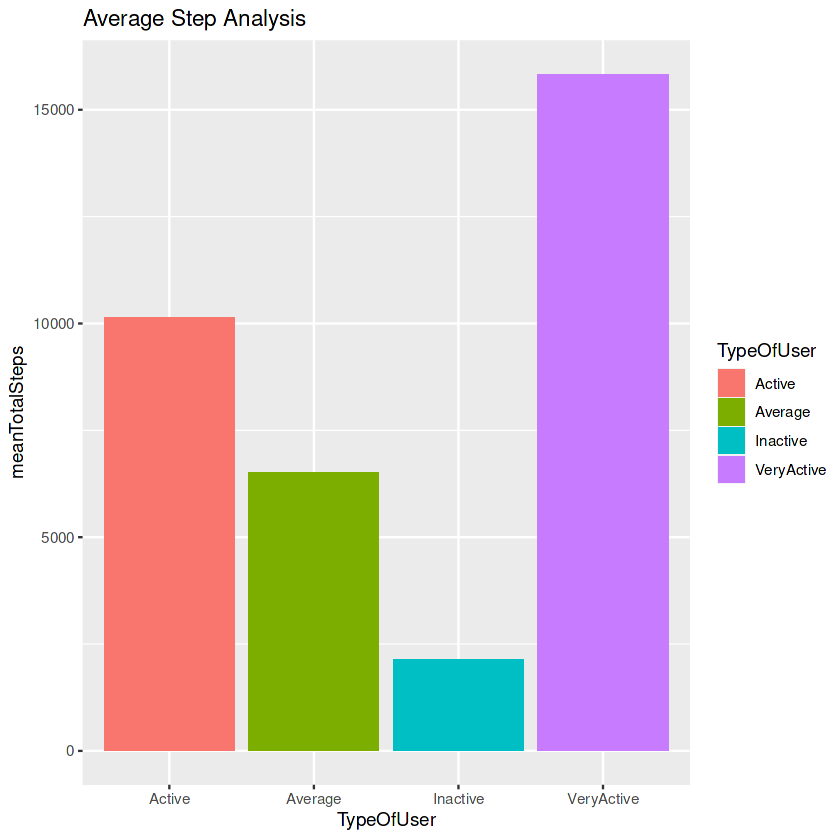

In [20]:
# 3a.
# Steps Analysis
ggplot(depth_analysis,aes(x= TypeOfUser,y= meanTotalSteps,fill= TypeOfUser)) +
  geom_col() +
  labs(title= "Average Step Analysis")

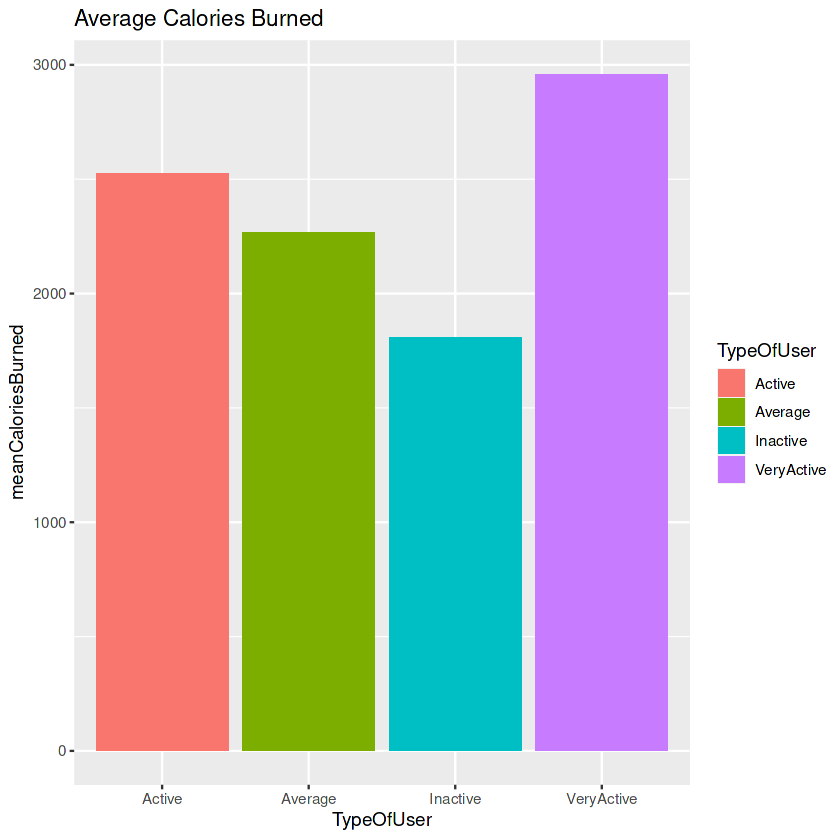

In [21]:
# 3b.
# Calories Burned Analysis
ggplot(depth_analysis,aes(x= TypeOfUser,y= meanCaloriesBurned,fill= TypeOfUser)) +
  geom_col() +
  labs(title = "Average Calories Burned")

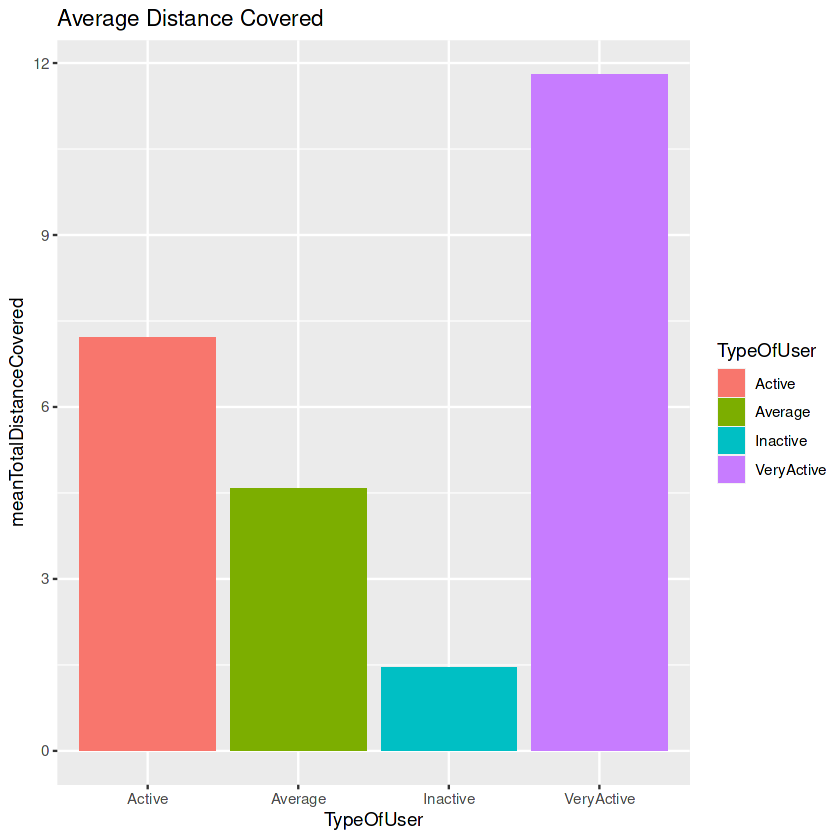

In [22]:
# 3c.
# Distance Covered Analysis
ggplot(depth_analysis,aes(x= TypeOfUser,y= meanTotalDistanceCovered,fill= TypeOfUser)) +
  geom_col() +
  labs(title = "Average Distance Covered")

`summarise()` has grouped output by 'DayOfWeek'. You can override using the
`.groups` argument.


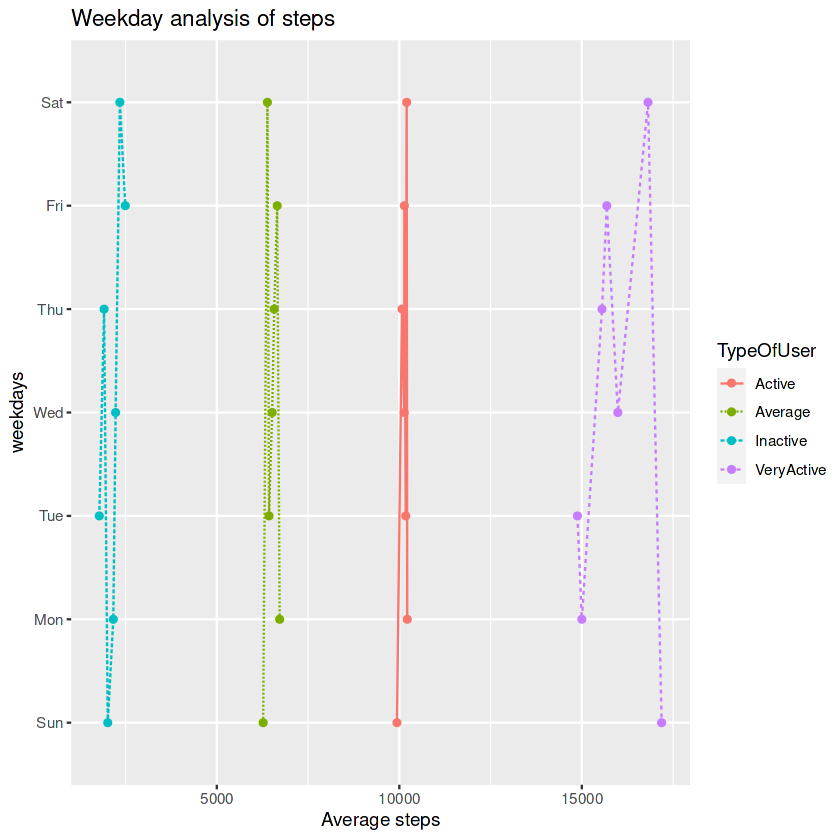

In [23]:
# 3d.
# Week days Analysis
dailyActivity_merged %>% 
  select(DayOfWeek,TypeOfUser,TotalSteps) %>% 
  group_by(DayOfWeek,TypeOfUser) %>% 
  summarise(mean_of_total_steps= mean(TotalSteps)) %>% 
  ggplot(aes(mean_of_total_steps,DayOfWeek,linetype= TypeOfUser,group= TypeOfUser,color= TypeOfUser)) +
  xlab("Average steps") + ylab("weekdays")+ labs(title = "Weekday analysis of steps") +
  geom_point() +
  geom_line()

ANALYSIS:

* The above graph provides a weekday Steps analysis of different type of users.

* The VeryActive Users were more active on Saturday & Sundays.

* The Active Users were consistent with their step counts through out the week.

# In order to findout a little more complex trends, I am merging the daily Activity dataset with Sleep Day dataset. The merged dataset can be used for further deep down analysis.

In [24]:
# 4
# Creating two different dataframes with required Columns

df1 <- dailyActivity_merged %>% 
  select(Id,ActivityDate,TotalDistance,TotalSteps,Calories,TotalActiveMinutes,TypeOfUser,DayOfWeek)

df2 <- sleepday %>% 
  select(Id,SleepDay,TotalMinutesAsleep,TotalTimeInBed,SleepQuality,TimeToSleep)

# Merging both dataframes
# Renaming the column names so that they can be joined together
  
colnames(df1)[2] <- "Date"
colnames(df2)[2] <- "Date"

merge_df <- merge(x = df1, y = df2,by.x =c("Id","Date"))
head(merge_df)

,Id,Date,TotalDistance,TotalSteps,Calories,TotalActiveMinutes,TypeOfUser,DayOfWeek,TotalMinutesAsleep,TotalTimeInBed,SleepQuality,TimeToSleep
,<dbl>,<dttm>,<dbl>,<int>,<int>,<int>,<fct>,<ord>,<int>,<int>,<fct>,<dbl>
1,1503960366,2016-04-12,8.50,13162,1985,366,VeryActive,Tue,327,346,insufficient,19
2,1503960366,2016-04-13,6.97,10735,1797,257,Active,Wed,384,407,Sufficient,23
3,1503960366,2016-04-15,6.28,9762,1745,272,Active,Fri,412,442,Sufficient,30
4,1503960366,2016-04-16,8.16,12669,1863,267,VeryActive,Sat,340,367,insufficient,27
5,1503960366,2016-04-17,6.48,9705,1728,222,Active,Sun,700,712,oversleeping,12
6,1503960366,2016-04-19,9.88,15506,2035,345,VeryActive,Tue,304,320,insufficient,16


In [25]:
# Analysing the Sleep Pattern among different type of Users

merge_df %>% 
  select(TotalMinutesAsleep,TypeOfUser) %>% 
  group_by(TypeOfUser) %>% 
  summarise(Average_sleep_time= mean(TotalMinutesAsleep))

TypeOfUser,Average_sleep_time
<fct>,<dbl>
Active,416.6951
Average,412.8721
Inactive,454.2917
VeryActive,381.3125


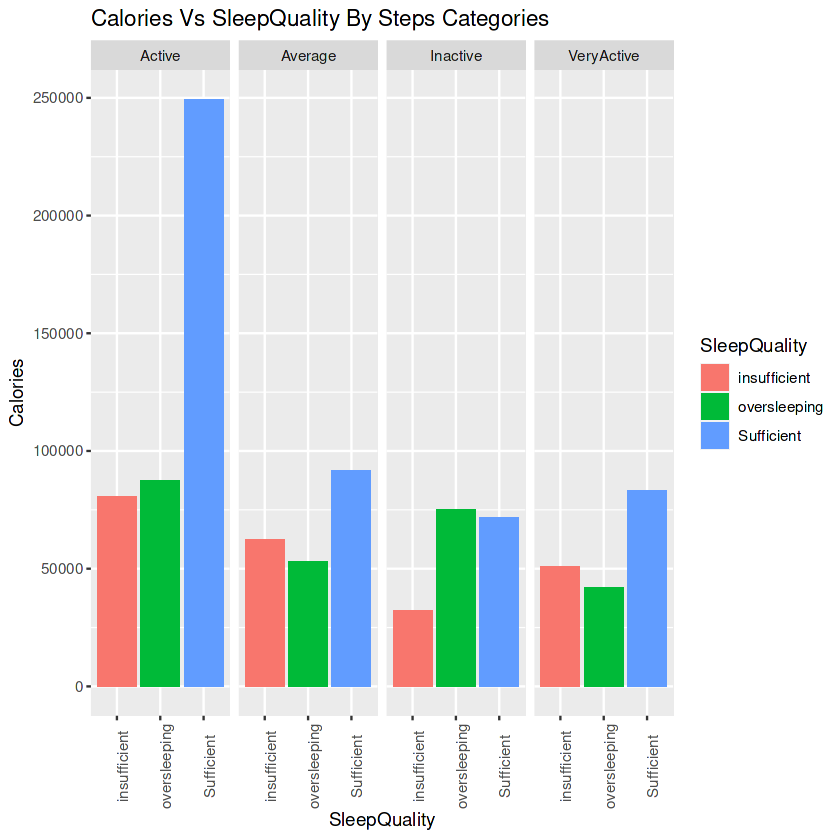

In [26]:
# Visualising the trends between the Calories ~ SleepQuality + Steps

ggplot(merge_df,aes(SleepQuality,Calories,fill= SleepQuality)) +
  geom_col() +
  facet_grid(~TypeOfUser) +
  theme(axis.text.x = element_text(angle=90)) +
  labs(title = "Calories Vs SleepQuality By Steps Categories")

ANALYSIS:

* In terms of total Calories Burned, most of the users fall into "Active" Class.There were less no. of "VeryActiveUsers" as compare to "Active" Users

* Inactive Users tends to spend more of their time sleeping which is unhealthy.

* We can clearly identify the underlying trends in each category of users.

merge_df$DayOfWeek,merge_df$TotalMinutesAsleep
<ord>,<dbl>
Sun,452.7455
Mon,419.5000
Tue,404.5385
Wed,434.6818
Thu,401.2969
Fri,405.4211
Sat,419.0702


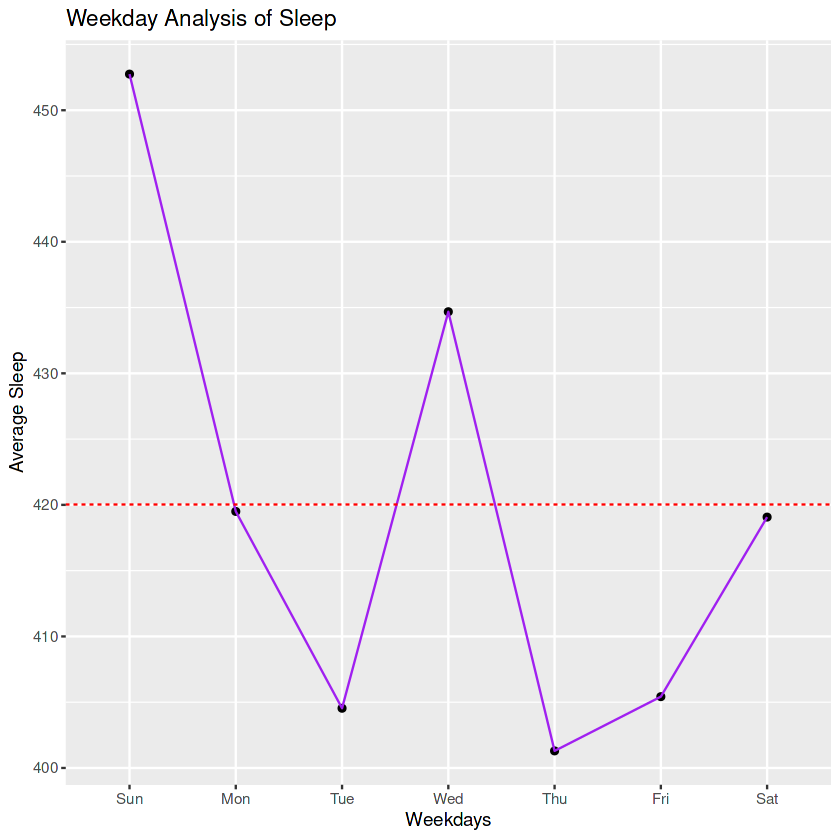

In [27]:
# Week day analysis of Total Minutes Asleep

aggregate(merge_df$TotalMinutesAsleep ~ merge_df$DayOfWeek,FUN = mean)

# Week days Analysis

merge_df %>%
  select(TotalMinutesAsleep,DayOfWeek) %>% 
  group_by(DayOfWeek) %>%
  summarise(mean_Asleep=mean(TotalMinutesAsleep)) %>%
  ggplot(aes(DayOfWeek,mean_Asleep,group=1))+
  xlab("Weekdays") +
  ylab("Average Sleep") +
  labs(title="Weekday Analysis of Sleep") +
  geom_point() +
  geom_line(color="Purple") +
  geom_hline(yintercept=420, linetype="dashed", color = "red")

ANALYSIS:

* It seems an interesting trend that maximum users tends to take rest on Sundays followed by Wednesdays.

Note-Here the dotted red line represent the recommended sleep duration (i.e 7 hrs)

* Tuesdays,Thursdays & Fridays are quite busy days (Sleep Duration is less on these days)

`summarise()` has grouped output by 'DayOfWeek'. You can override using the
`.groups` argument.
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


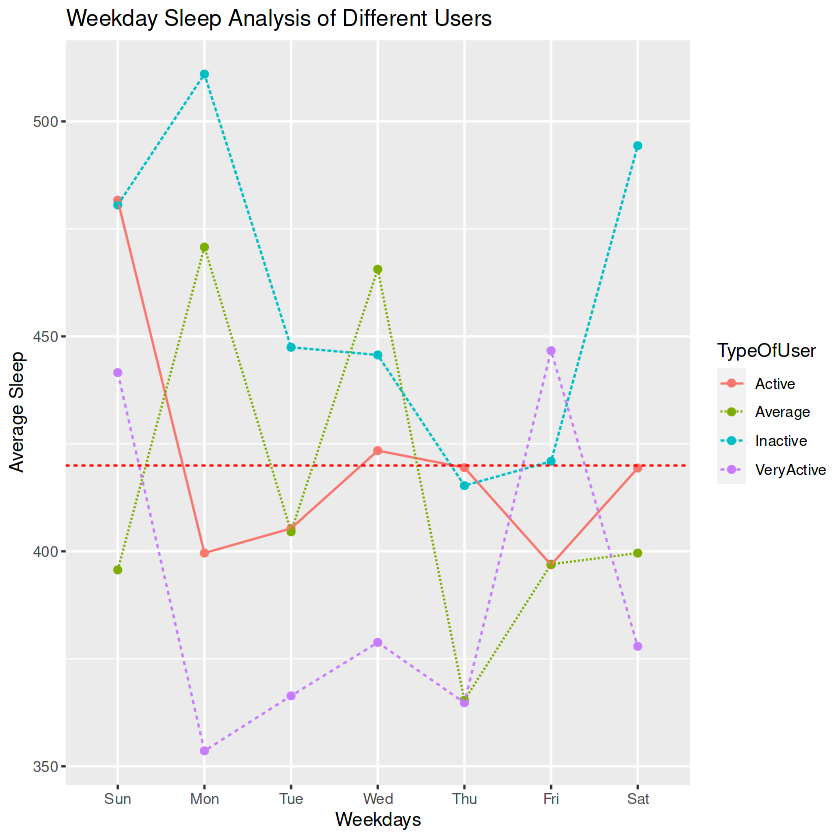

In [28]:
# Deriving the Sleep Pattern of individual type of Users:VeryActive,Active,Average,Inactive

merge_df %>% 
  select(TotalMinutesAsleep,DayOfWeek,TypeOfUser) %>% 
  group_by(DayOfWeek,TypeOfUser) %>% 
  summarise(mean_Asleep= mean(TotalMinutesAsleep)) %>% 
  ggplot(aes(DayOfWeek,mean_Asleep,group=TypeOfUser,linetype=TypeOfUser,color=TypeOfUser))+
  xlab("Weekdays")+
  ylab("Average Sleep")+
  labs(title="Weekday Sleep Analysis of Different Users")+
  geom_point()+
  geom_line(size=0.5)+
  geom_hline(yintercept=420, linetype="dashed", color = "red")


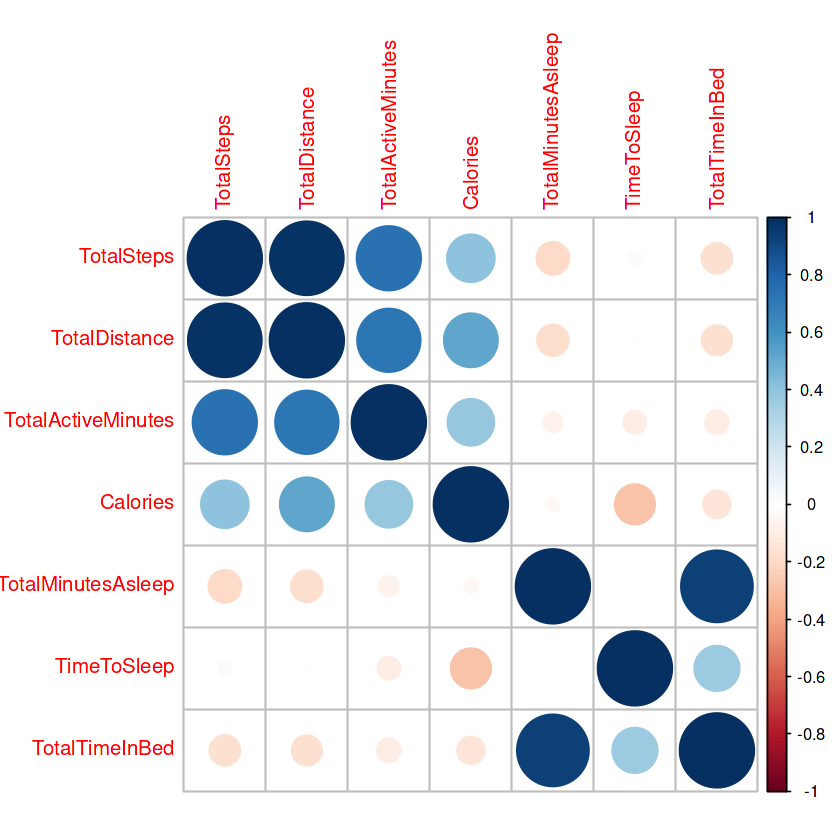

In [29]:
# Correlation Plot

correlation_data <- merge_df %>%
  select(TotalSteps,TotalDistance,TotalActiveMinutes,Calories,TotalMinutesAsleep,TimeToSleep,TotalTimeInBed)

# Correlathon Plot
corrplot(cor(correlation_data))

SHARE
SUMMARY OF THE IMPORTANT FINDINGS FROM ABOVE ANALYSIS:

* We can see that the Average of Total Steps Count is 7600(approx) which is little lower than the average daily steps count preferred by WHO i.e 8000 steps


Recommendation: Bellabeat can notify its user through their mobile application regarding the remaining daily steps count to complete. The maximum number of users fall into Inactive Category and Bellabeat can focus on these users.

* There is a unique finding from the above analysis, the "TimeToSleep" (attribute which calculate the time difference between Total time in bed and total time asleep) helps to identify that average time interval is 39.31 minutes.

Recommendation: Belabeat can use this data to Monitor the sleep Pattern and can provide suggestion to its Users on "How to improve the sleep Quality?" etc.

* We can see that there exist a positive correlation between the totalsteps~Calories.Its obvious thing that higher the number of TotalSteps, higher will be the calories burned. And this hypothesis is proved by above graph.

* We can clearly distinguish the difference between average Lightly Active Minutes and Fairly/Moderate/Very Active Minutes. The average Sedentary Minutes is also quite high i.e 16hrs(approx) which concludes that most of the users were Lightly Active or Inactive.

* From weekday Steps analysis of different type of users. We found that;
      1. The VeryActive Users were more active on Saturday & Sundays.
      2.The Active Users were consistent with their step counts through out the week.

* There are less no. of "VeryActiveUsers" as compare to "Active" Users.Inactive Users tends to spend more of their time sleeping which is unhealthy.We can clearly identify the underlying trends in each category of users(Refer to Calories Vs. Sleep Quality By Steps Categories Graph).

* It seems an interesting trend that maximum users tends to take rest on Sundays followed by Wednesdays.Tuesdays,Thursdays & Fridays are quite busy days (Sleep Duration is less on these days)

Recommendation: On busy Days where the sleep duration is below the recommended hours, the bellabeat app can notify users that the amount of Sleep is not sufficient enough and its an unhealthy routine.

# This was a Case Study for the Google Data Analytics Certificate.